In [98]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [99]:
path_productos = r'C:\Users\Usuario\Documents\AI JOBS\centro ryv\241123.csv'

dtf_productos = pd.read_csv(path_productos, sep= ';', header=None, names=['Marca', 'CodArticu', 'Descripcion', 'PrecioTarjeta', 'PrecioEfectivo','Stock','photo','Modelo','Familia','1','2'])

dtf_productos

,Marca,CodArticu,Descripcion,PrecioTarjeta,PrecioEfectivo,Stock,photo,Modelo,Familia,1,2
0,RENAULT,7702109631 B,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,1663.04,1496.75,2,32128.JPG,R-18,ABRAZADERA,1.0,NaN
1,RENAULT,7700654558 B,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,1996.42,1796.80,2,32112.JPG,R-18,ABRAZADERA,1.0,NaN
2,RENAULT,7701470760 B,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...,794.98,715.49,10,36205L.JPG,CLIO,ABRAZADERA,1.0,NaN
3,RENAULT,7701469491 B,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...,1808.50,1627.67,6,36207L.JPG,SCENIC,ABRAZADERA,1.0,NaN
4,RENAULT,7701471142 B,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...,1836.36,1652.74,2,36206L.JPG,CLIO,ABRAZADERA,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4743,VOLKSWAGEN,307/905865/1/ B,ZOCALO LLAVE CONTACTO VW GAC-SEN-GOL-SAV ...,10716.14,9644.62,2,905866L.JPG,GACEL|GACEL|SENDA|GOL|SAVEIRO,ZOCALO,1.0,NaN
4744,VOLKSWAGEN,4B0/905849// C,ZOCALO LLAVE CONTACTO VW GLFIV-TREND12 ...,14349.53,12914.71,1,905870.JPG,GOLF,ZOCALO,1.0,NaN
4745,VOLKSWAGEN,6N0/905865// B,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,19327.29,17394.74,1,905868L.JPG,GOL|GOLF|POLO|CADDY,ZOCALO,1.0,NaN
4746,VOLKSWAGEN,6N0/905865// E,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,9096.89,8187.28,3,logo_centro.renault.png,GOL|GOLF|POLO|CADDY,ZOCALO,1.0,NaN


In [100]:
# select only useful columns
dtf_productos = dtf_productos[["Marca","CodArticu","Modelo","Familia", 'Descripcion']]
dtf_productos.head()

,Marca,CodArticu,Modelo,Familia,Descripcion
0,RENAULT,7702109631 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
1,RENAULT,7700654558 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
2,RENAULT,7701470760 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...
3,RENAULT,7701469491 B,SCENIC,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...
4,RENAULT,7701471142 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...


In [101]:
dtf_familia = dtf_productos

# Crea variables dummy para la columna "Marca"
dummies_Familia = pd.get_dummies(dtf_familia['Familia'], prefix='Familia')

# Convierte los valores True/False a 1/0
dummies_Familia = dummies_Familia.astype(int)

# Concatena las variables dummy al DataFrame original
dtf_familia = pd.concat([dtf_familia, dummies_Familia], axis=1)

dtf_familia = dtf_familia.drop(['Marca','Modelo','Familia','Descripcion'], axis=1)

dtf_familia = dtf_familia.set_index('CodArticu')

dtf_familia

,Familia_ABRAZADERA,Familia_ACCIONADOR,Familia_ACOPLE,Familia_AIREADOR,Familia_AISLANTE,Familia_ALARMA,Familia_ALOJAMIENTO,Familia_AMORTIGUADOR,Familia_ANILLO,Familia_ANTECUERPO,...,Familia_TRICETA,Familia_TUBO,Familia_TUERCA,Familia_UNION,Familia_VAINA,Familia_VALVULA,Familia_VARILLA,Familia_VIDRIO,Familia_VIROLA,Familia_ZOCALO
CodArticu,,,,,,,,,,,,,,,,,,,,,
7702109631 B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7700654558 B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7701470760 B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7701469491 B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7701471142 B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307/905865/1/ B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4B0/905849// C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6N0/905865// B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
dtf_productos

,Marca,CodArticu,Modelo,Familia,Descripcion
0,RENAULT,7702109631 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
1,RENAULT,7700654558 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
2,RENAULT,7701470760 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...
3,RENAULT,7701469491 B,SCENIC,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...
4,RENAULT,7701471142 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...
...,...,...,...,...,...
4743,VOLKSWAGEN,307/905865/1/ B,GACEL|GACEL|SENDA|GOL|SAVEIRO,ZOCALO,ZOCALO LLAVE CONTACTO VW GAC-SEN-GOL-SAV ...
4744,VOLKSWAGEN,4B0/905849// C,GOLF,ZOCALO,ZOCALO LLAVE CONTACTO VW GLFIV-TREND12 ...
4745,VOLKSWAGEN,6N0/905865// B,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...
4746,VOLKSWAGEN,6N0/905865// E,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...


c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


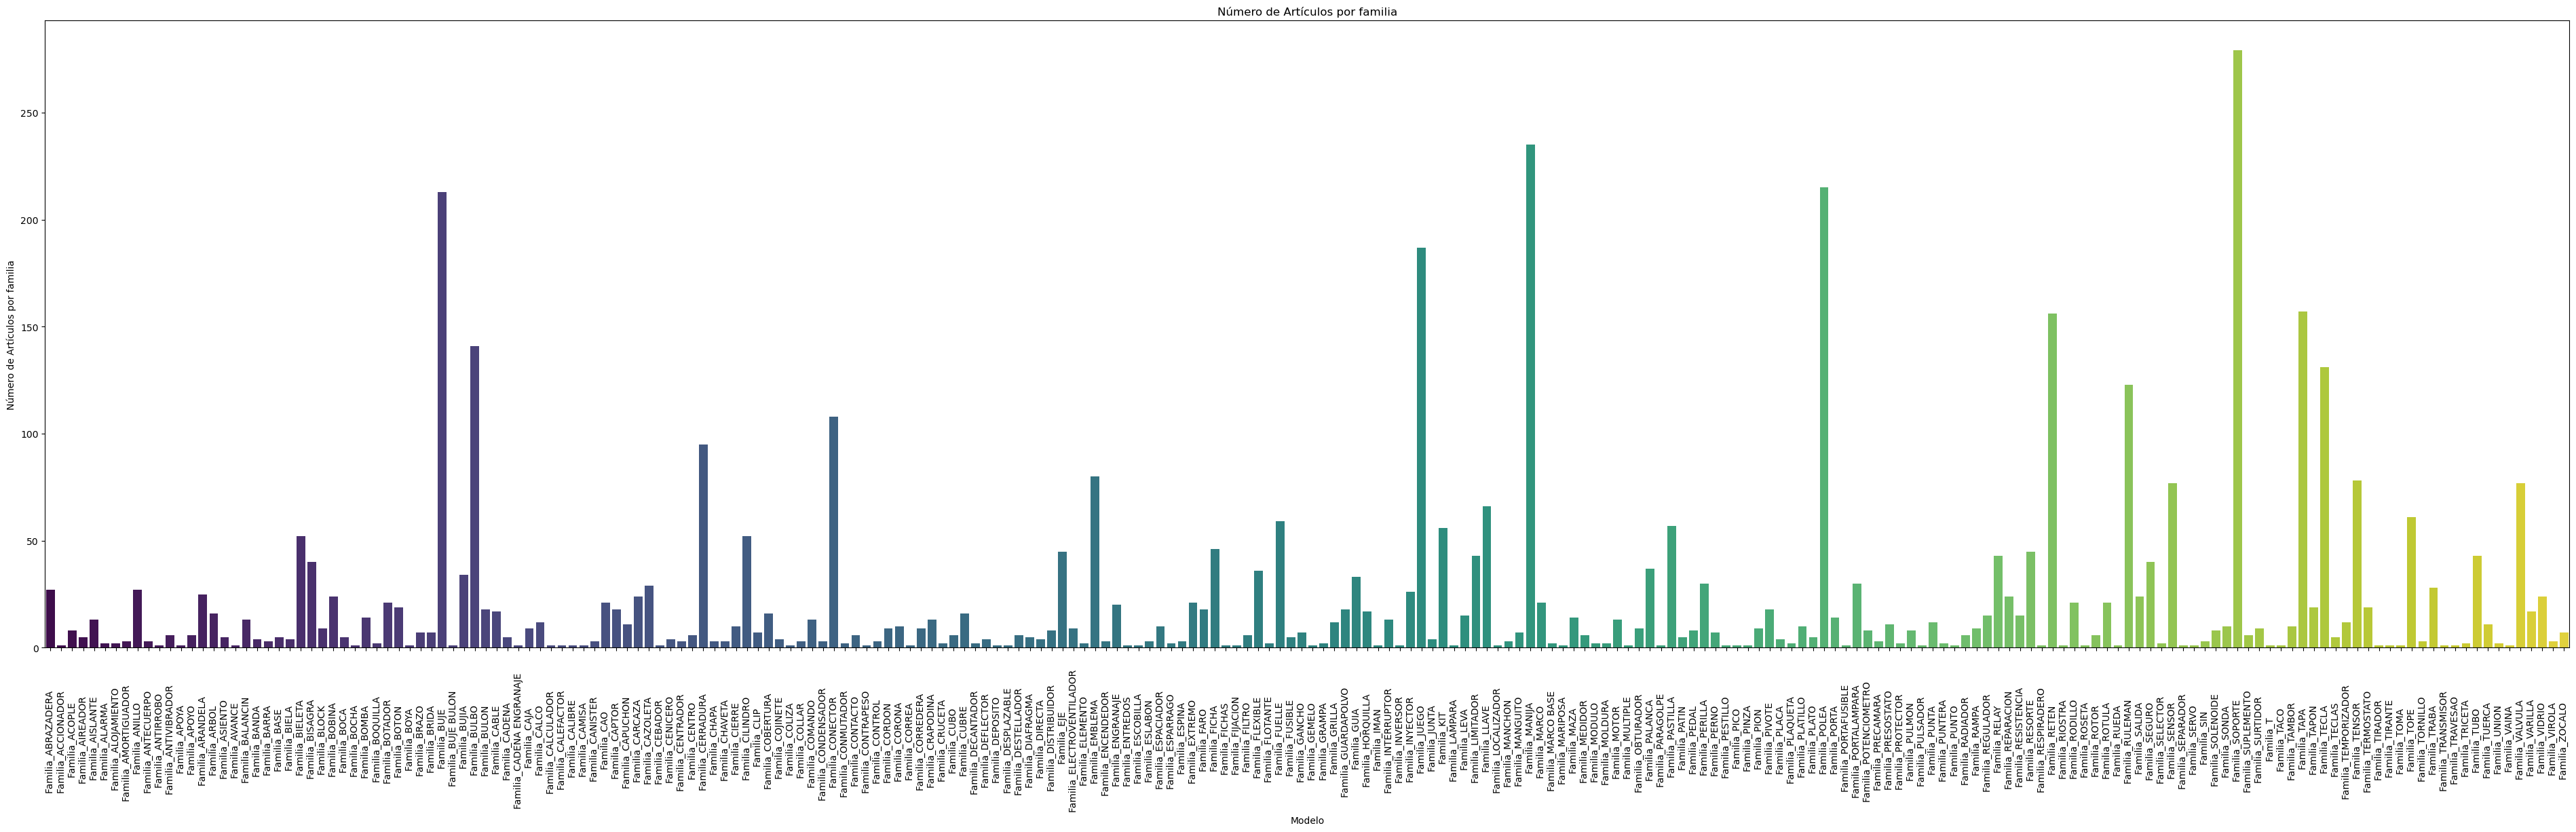

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las ocurrencias de cada modelo
familia_counts_counts = dtf_familia.sum()


# Crear gráfico de barras para modelos
plt.figure(figsize=(48, 12))
sns.barplot(x=familia_counts_counts.index, y=familia_counts_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Número de Artículos por familia')
plt.title('Número de Artículos por familia')
plt.show()


dtf_modelos

In [104]:
dtf_modelos = dtf_productos

dtf_modelos

,Marca,CodArticu,Modelo,Familia,Descripcion
0,RENAULT,7702109631 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
1,RENAULT,7700654558 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...
2,RENAULT,7701470760 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...
3,RENAULT,7701469491 B,SCENIC,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...
4,RENAULT,7701471142 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...
...,...,...,...,...,...
4743,VOLKSWAGEN,307/905865/1/ B,GACEL|GACEL|SENDA|GOL|SAVEIRO,ZOCALO,ZOCALO LLAVE CONTACTO VW GAC-SEN-GOL-SAV ...
4744,VOLKSWAGEN,4B0/905849// C,GOLF,ZOCALO,ZOCALO LLAVE CONTACTO VW GLFIV-TREND12 ...
4745,VOLKSWAGEN,6N0/905865// B,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...
4746,VOLKSWAGEN,6N0/905865// E,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...


In [ ]:
# select only useful columns
dtf_productos = dtf_productos[["Marca","CodArticu","Modelo","Familia", 'Descripcion']]
dtf_productos.head()

In [89]:
dtf_modelos = dtf_productos


tags = [i.split("|") for i in dtf_modelos["Modelo"].unique()]
columns = list(set([i for lst in tags for i in lst]))
# Eliminar espacios en blanco extras
columns = [col.strip() for col in columns]
print(columns)

for col in columns:
    dtf_modelos[col] = dtf_modelos["Modelo"].apply(lambda x: 1 if col in x else 0)

dtf_modelos = dtf_modelos.drop(['Marca','Modelo','Descripcion','Familia'], axis=1)
dtf_modelos.head()

['TWINGO', 'R-21', 'CARAT', 'SHARAN', 'TWINGO', 'DUSTER', 'VENTO', 'PASSAT', 'MEGANE', 'R-12', 'KWID', 'PASSAT', 'MASTER', 'CAPTUR', 'UP', 'UP', 'SAVEIRO', 'CADDY', 'BORA', 'MASTER', 'SAVEIRO', 'QUANTUM', 'GACEL', 'SYMBOL', 'TOUAREG', 'GOL', 'SHARAN', 'SCENIC', 'CONSULTAR MODELO', 'BORA', 'TWINGO', 'TRAFIC', 'OROCH', 'SCENIC', 'UP', 'CAPTUR', 'POLO', 'SANDERO', 'SHARAN', 'QUANTUM', 'CADDY', 'TRAFIC', 'GOLF', 'MASTER', 'POINTER', 'KANGOO', 'FOX', 'MEGANE', 'COURIER', 'GOL', 'SURAN', 'TRAFIC', 'SENTRA', 'R-6', 'R-18', 'UP', 'UP', 'LAGUNA', 'VENTO', 'SCENIC', 'AMAROK', 'POLO', 'BORA', 'UP', 'PASSAT', 'SENDA', 'EXPRESS', 'AMAROK', 'FOX', 'POLO', 'PASSAT', 'FOX', 'TWINGO', 'PASSAT', 'SCENIC', 'VENTO', 'TRAFIC', 'UP', 'PASSAT', 'MASTER', 'SANDERO', 'SAVEIRO', 'R-12', 'DODGE 1500', 'SANDERO', 'MEGANE', 'CAPTUR', 'VERSA', 'GOL', 'LAGUNA', 'SAVEIRO', 'EXPRESS', 'R-11', 'SCENIC', 'BORA', 'GOLF', 'TIGUAN', 'POLO', 'CADDY', 'GOL', 'DODGE 1500', 'R-19', 'KWID', 'TRAFIC', 'SAVEIRO', 'TRANSPORTER', '

,CodArticu,TWINGO,R-21,CARAT,SHARAN,DUSTER,VENTO,PASSAT,MEGANE,R-12,...,CLIO,VOYAGE,TIIDA,KOLEOS,R4 R4S R4L,NOTE,FLUENCE,SCIROCCO,FRONTIER,KICK
0,7702109631 B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7700654558 B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7701470760 B,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7701469491 B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7701471142 B,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


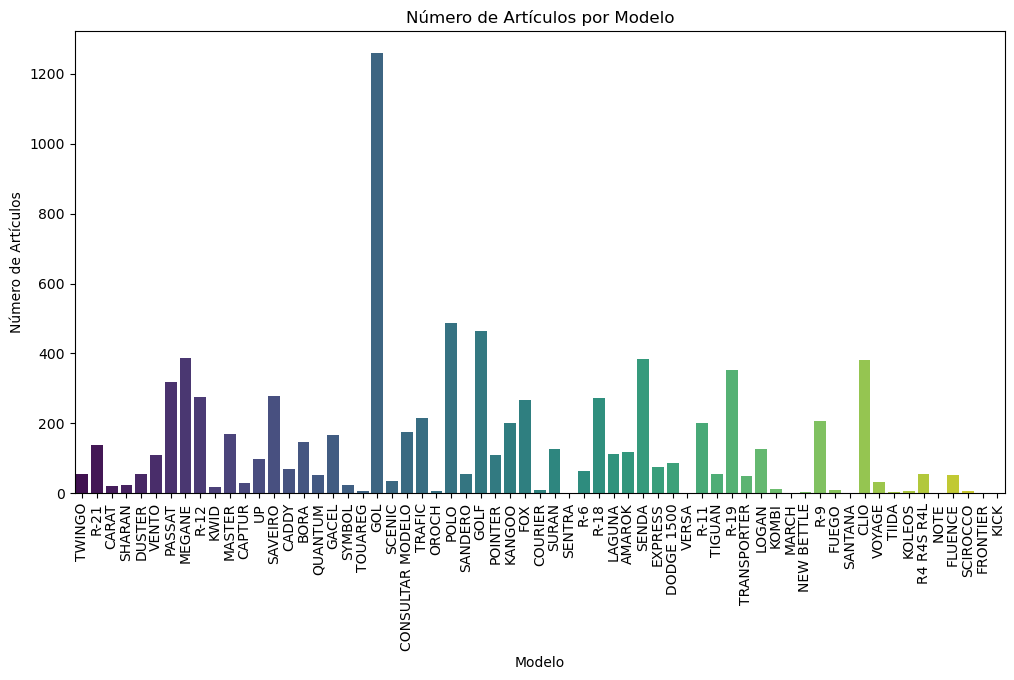

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las ocurrencias de cada modelo
modelo_counts = dtf_modelos[columns].sum()


# Crear gráfico de barras para modelos
plt.figure(figsize=(12, 6))
sns.barplot(x=modelo_counts.index, y=modelo_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Modelo')
plt.show()


In [91]:
dtf_marcas = dtf_productos

# Crea variables dummy para la columna "Marca"
dummies_marca = pd.get_dummies(dtf_marcas['Marca'], prefix='Marca')

# Convierte los valores True/False a 1/0
dummies_marca = dummies_marca.astype(int)

# Concatena las variables dummy al DataFrame original
dtf_marcas = pd.concat([dtf_marcas, dummies_marca], axis=1)

dtf_marcas

,Marca,CodArticu,Modelo,Familia,Descripcion,TWINGO,R-21,CARAT,SHARAN,DUSTER,...,KOLEOS,R4 R4S R4L,NOTE,FLUENCE,SCIROCCO,FRONTIER,KICK,Marca_NISSAN,Marca_RENAULT,Marca_VOLKSWAGEN
0,RENAULT,7702109631 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,RENAULT,7700654558 B,R-18,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,RENAULT,7701470760 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,RENAULT,7701469491 B,SCENIC,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,RENAULT,7701471142 B,CLIO,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,VOLKSWAGEN,307/905865/1/ B,GACEL|GACEL|SENDA|GOL|SAVEIRO,ZOCALO,ZOCALO LLAVE CONTACTO VW GAC-SEN-GOL-SAV ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4744,VOLKSWAGEN,4B0/905849// C,GOLF,ZOCALO,ZOCALO LLAVE CONTACTO VW GLFIV-TREND12 ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4745,VOLKSWAGEN,6N0/905865// B,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4746,VOLKSWAGEN,6N0/905865// E,GOL|GOLF|POLO|CADDY,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
dtf_productos = dtf_productos.drop(['Marca', 'Modelo'], axis=1)


In [8]:
dtf_productos

,CodArticu,Familia,Descripcion,TWINGO,R-21,CARAT,SHARAN,DUSTER,VENTO,PASSAT,...,KOLEOS,R4 R4S R4L,NOTE,FLUENCE,SCIROCCO,FRONTIER,KICK,Marca_NISSAN,Marca_RENAULT,Marca_VOLKSWAGEN
0,7702109631 B,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7700654558 B,ABRAZADERA,ABRAZADERA BARRA ESTABILIZADORA R-18 (CONSULTA...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7701470760 B,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO2 (GO...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7701469491 B,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA SCENIC(GO...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7701471142 B,ABRAZADERA,ABRAZADERA CAJA DIRECCION HIDRAULICA CLIO 2 (G...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,307/905865/1/ B,ZOCALO,ZOCALO LLAVE CONTACTO VW GAC-SEN-GOL-SAV ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4744,4B0/905849// C,ZOCALO,ZOCALO LLAVE CONTACTO VW GLFIV-TREND12 ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4745,6N0/905865// B,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4746,6N0/905865// E,ZOCALO,ZOCALO LLAVE CONTACTO VW POLO-GOLF-CADDY ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
print(columns)

['TWINGO', 'R-21', 'CARAT', 'SHARAN', 'TWINGO', 'DUSTER', 'VENTO', 'PASSAT', 'MEGANE', 'R-12', 'KWID', 'PASSAT', 'MASTER', 'CAPTUR', 'UP', 'UP', 'SAVEIRO', 'CADDY', 'BORA', 'MASTER', 'SAVEIRO', 'QUANTUM', 'GACEL', 'SYMBOL', 'TOUAREG', 'GOL', 'SHARAN', 'SCENIC', 'CONSULTAR MODELO', 'BORA', 'TWINGO', 'TRAFIC', 'OROCH', 'SCENIC', 'UP', 'CAPTUR', 'POLO', 'SANDERO', 'SHARAN', 'QUANTUM', 'CADDY', 'TRAFIC', 'GOLF', 'MASTER', 'POINTER', 'KANGOO', 'FOX', 'MEGANE', 'COURIER', 'GOL', 'SURAN', 'TRAFIC', 'SENTRA', 'R-6', 'R-18', 'UP', 'UP', 'LAGUNA', 'VENTO', 'SCENIC', 'AMAROK', 'POLO', 'BORA', 'UP', 'PASSAT', 'SENDA', 'EXPRESS', 'AMAROK', 'FOX', 'POLO', 'PASSAT', 'FOX', 'TWINGO', 'PASSAT', 'SCENIC', 'VENTO', 'TRAFIC', 'UP', 'PASSAT', 'MASTER', 'SANDERO', 'SAVEIRO', 'R-12', 'DODGE 1500', 'SANDERO', 'MEGANE', 'CAPTUR', 'VERSA', 'GOL', 'LAGUNA', 'SAVEIRO', 'EXPRESS', 'R-11', 'SCENIC', 'BORA', 'GOLF', 'TIGUAN', 'POLO', 'CADDY', 'GOL', 'DODGE 1500', 'R-19', 'KWID', 'TRAFIC', 'SAVEIRO', 'TRANSPORTER', '

c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


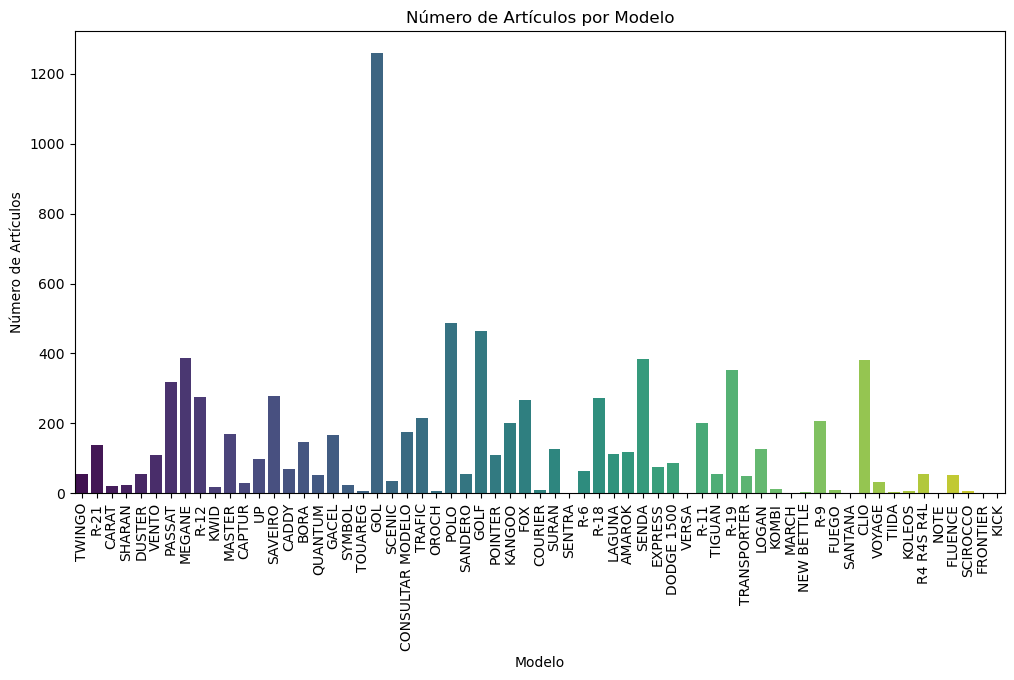

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las ocurrencias de cada modelo
modelo_counts = dtf_productos[columns].sum()


# Crear gráfico de barras para modelos
plt.figure(figsize=(12, 6))
sns.barplot(x=modelo_counts.index, y=modelo_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Modelo')
plt.show()



In [11]:
print(dtf_productos.columns)

Index(['CodArticu', 'Familia', 'Descripcion', 'TWINGO', 'R-21', 'CARAT',
       'SHARAN', 'DUSTER', 'VENTO', 'PASSAT', 'MEGANE', 'R-12', 'KWID',
       'MASTER', 'CAPTUR', 'UP', 'SAVEIRO', 'CADDY', 'BORA', 'QUANTUM',
       'GACEL', 'SYMBOL', 'TOUAREG', 'GOL', 'SCENIC', 'CONSULTAR MODELO',
       'TRAFIC', 'OROCH', 'POLO', 'SANDERO', 'GOLF', 'POINTER', 'KANGOO',
       'FOX', 'COURIER', 'SURAN', 'SENTRA', 'R-6', 'R-18', 'LAGUNA', 'AMAROK',
       'SENDA', 'EXPRESS', 'DODGE 1500', 'VERSA', 'R-11', 'TIGUAN', 'R-19',
       'TRANSPORTER', 'LOGAN', 'KOMBI', 'MARCH', 'NEW BETTLE', 'R-9', 'FUEGO',
       'SANTANA', 'CLIO', 'VOYAGE', 'TIIDA', 'KOLEOS', 'R4 R4S R4L', 'NOTE',
       'FLUENCE', 'SCIROCCO', 'FRONTIER', 'KICK', 'Marca_NISSAN    ',
       'Marca_RENAULT   ', 'Marca_VOLKSWAGEN'],
      dtype='object')


c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


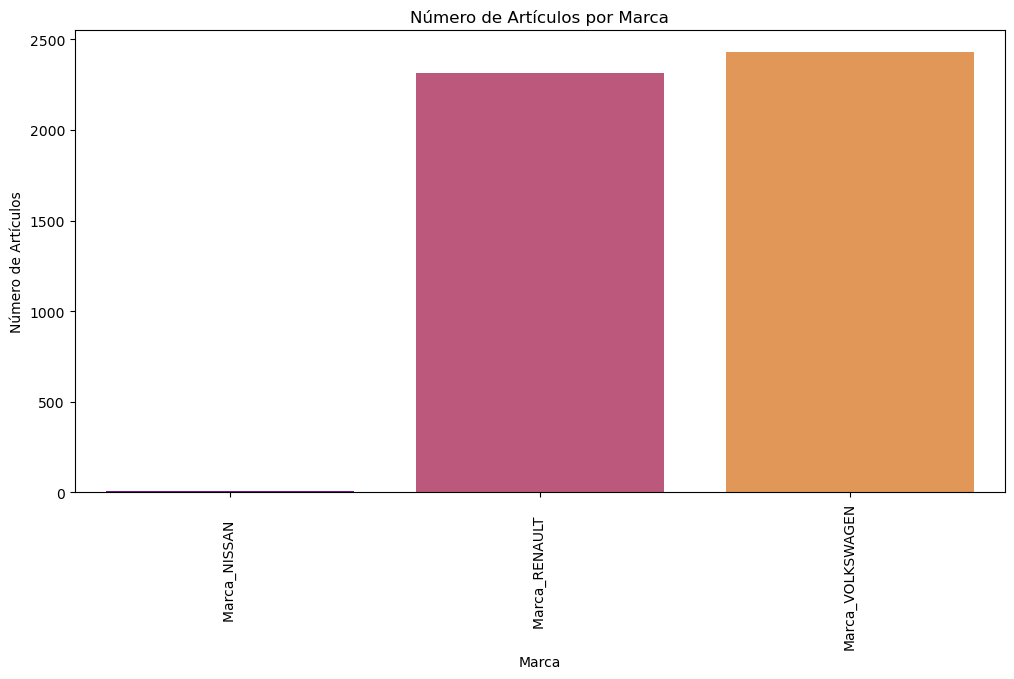

In [12]:
# Contar las ocurrencias de cada marca
marcas_seleccionadas = ['Marca_NISSAN    ','Marca_RENAULT   ', 'Marca_VOLKSWAGEN']
marca_counts = dtf_productos[marcas_seleccionadas].sum()

# Crear gráfico de barras para marcas
plt.figure(figsize=(12, 6))
sns.barplot(x=marca_counts.index, y=marca_counts.values, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Marca')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Marca')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

relevant_features = ['PrecioTarjeta', 'PrecioEfectivo', 'Stock']
data_for_clustering = dtf_productos[relevant_features].dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Elegir el número de clusters (puedes ajustar esto según tu análisis)
num_clusters = 3

# Aplicar el algoritmo de K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dtf_productos['cluster'] = kmeans.fit_predict(scaled_data)

# Analizar los clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Transformar de nuevo a la escala original
dtf_productos['cluster_centers'] = dtf_productos['cluster'].map(lambda x: cluster_centers[x])

# Mostrar el DataFrame resultante con las asignaciones de clusters
print(dtf_productos[['Descripcion', 'PrecioTarjeta', 'PrecioEfectivo', 'Stock', 'cluster', 'cluster_centers']])